# Hierarchical clustering for session 2

## Make spiketimes and events dataframe

In [ ]:
# HIDE CODE 
import deps
from importlib import reload
reload(deps)
alldat, dat_LFP, dat_ST = deps.get_data() 
dat = alldat[2]
dat_st=dat_ST[2]['ss']

## Cluster entire trial, no PSTH

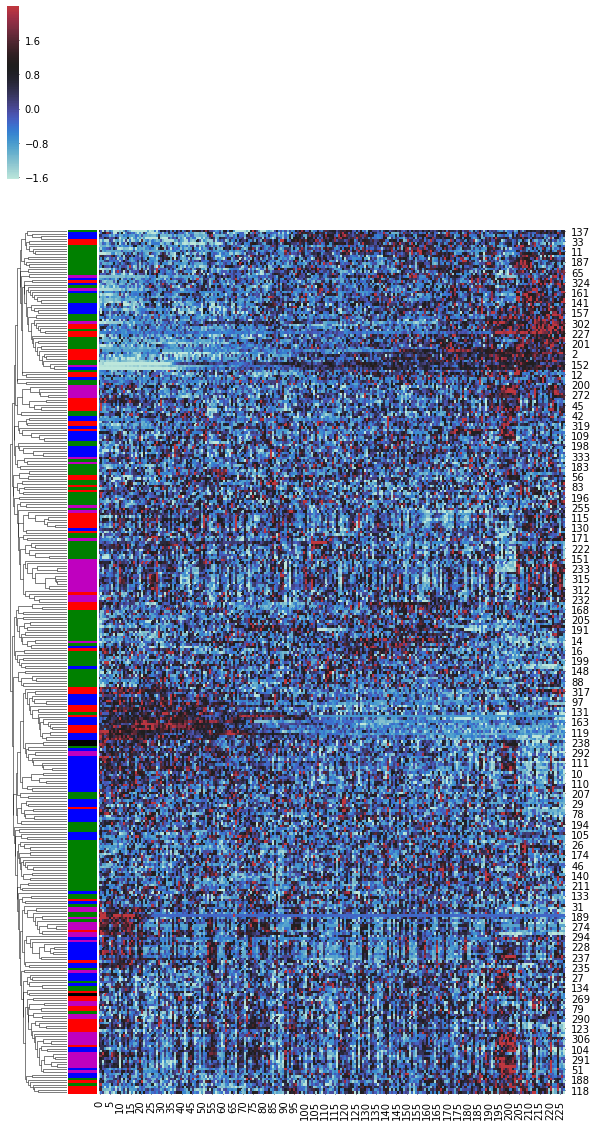

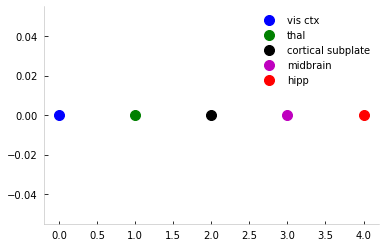

In [10]:
# HIDE CODE
deps.cluster_trial_start(dat['spks'], deps.spykes_get_brain_regions(dat['brain_area']))

##  Clustered PSTHs 
### Make PSTHs from spiketimes

In [ ]:
# 
reload(deps)

sp, neu, trial_starts = deps.concat_spiketimes(dat_st)
events_df = deps.convert_events_to_dataframe(dat, trial_starts,
                                        event_names=('gocue', 'response_time','feedback_time'),
                                        condition_names=('response','contrast_right','contrast_left','feedback_type'))

spykes_times = deps.spykes_get_times(sp, neu,thr_n_spikes=55)
spykes_times = deps.spykes_add_brain_regions(spykes_times, dat['brain_area'])

## Reproduce whole trial from spiketimes

In [ ]:
_, all_psth = deps.get_psth(spikes=spykes_times,
                       spykes_df=events_df,
                       event=event_name, 
                       conditions=condition_name,
                       window=[-800, 800],  
                       bin_size=15,
                       )
# Make psth
xar=deps.spyke2xar(all_psth,
                   spykes_times['brain_group'].values,  
                   spykes_times['brain_group_color'].values)

# Cluster
df,df_tidy,index=deps.cluster(xar,plotose=True,thr_n_spikes=30) 

## Loop over events and conditions

In [ ]:
# HIDE CODE
reload(deps)

for event_name in events_df.columns[events_df.columns.str.contains('time')]:
    for condition_name in events_df.columns[~events_df.columns.str.contains('time')]:
        print(f"======= {event_name} / {condition_name} =======")
        _, all_psth = deps.get_psth(spikes=spykes_times,
                               spykes_df=events_df,
                               event=event_name, 
                               conditions=condition_name,
                               window=[-800, 800],  
                               bin_size=15,
                               )
        # Make psth
        xar=deps.spyke2xar(all_psth,
                           spykes_times['brain_group'].values,  
                           spykes_times['brain_group_color'].values)

        # Cluster
        df,df_tidy,index=deps.cluster(xar,plotose=True,thr_n_spikes=30)

======= time_gocue / response =======
